# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [8]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

## Is the distribution of body temperatures normal? 

What we will do is compare the empirical cumulative distribution function of the data to the theoretical cumulative distribution function of a normal distrubution and compare. The normal distribution will be created using the mean and variance from the original dataset.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# Create the ECDF for the data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y

temp_x, temp_y = ecdf(df['temperature'])


mean = np.mean(df['temperature'])
var = np.var(df['temperature'])
size = len(df['temperature'])

normal_x, normal_y = ecdf(np.random.normal(mean, var, size))



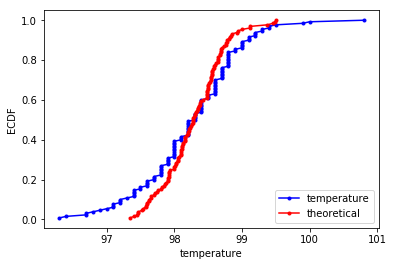

In [21]:
plt.plot(temp_x, temp_y, marker='.', color='blue')
plt.plot(normal_x, normal_y, marker='.', color='red')

plt.xlabel('temperature')
plt.ylabel('ECDF')
plt.legend(('temperature','theoretical'), loc='lower right')

plt.show()

The blue plot in the above graph is the cumulative distribution function of the body temperatures taken from the original data source, and the red is taken from a normal distribution with the same mean and variance as the data source.  As can be seen in the graph, the blue plot approximately follows a normal distribution and hence we can conclude that the distribution of the body temperature is normal.

## Is the sample size large? Are the observations independent? 

In [22]:
print 'size of sample is: ', len(df['temperature'])

size of sample is:  130


The sample size is very small, with only 130 samples in the dataset.  But the observations are independent, as one person's body temperature does not affect another observation.


## Is the true population mean really 98.6 degrees F? 

The setup is we have a datasource of observations, and a theoretical temperature of the population mean.  Since we have one sample available to base our hypothesis testing off of, we use a one-sample testing. Also as our initial testing, we will use the t-test because we do not know the population standard deviation.  Usually, if the dataset has less than 30 observations, or has no known population standard deviation, we would use the t-test. <br>

How we will test if the true population mean is 98.6 is as follows <br>
1) our null hypothesis is that there is no significant difference between the population mean and the observed mean.  
2) we will first shift the observed data's mean to the population mean <br>
3) Then we will bootstrap from the sample by using np.random.choice, and repeat this multiple times<br>
4) plot a historgram of the difference in mean temperature between the bootstrapped samples, and the population mean, and figure out the z-score/t-score based. <br>


In [26]:
pop_mean = 98.6
obs_mean = np.mean(df['temperature'])
diff_mean = np.abs(pop_mean-obs_mean)

In [27]:
print obs_mean, diff_mean

98.2492307692 0.350769230769


In [29]:
#shift the dataset so the mean will match the population mean
shifted_df = df['temperature'] - obs_mean + pop_mean
np.mean(shifted_df)

98.59999999999992

In [39]:
from scipy import stats

# create the randomly taken samples from the shifted array and take the means.
trials = 1000
test_means = np.empty(trials)

for i in range(trials):
    temp_list = np.random.choice(shifted_df, len(shifted_df))
    test_means[i] = np.mean(temp_list)    

In [40]:
#we want to see if the difference in temperature from the population mean is significant.
test_diffs = test_means - pop_mean  
stats.ttest_1samp(test_diffs, diff_mean)

Ttest_1sampResult(statistic=-172.60671366232535, pvalue=0.0)

The above result basically tells us that if the datasource was truly representative of the population mean, there is a very low chance (almost impossible) that the mean we observed would be there.  <br>

now we will try using the z-test to see the outcome.

In [46]:
#compute the z-score for the difference
def get_z(data_array, sample):
    return (sample - np.mean(data_array))/float(np.std(data_array))

print get_z(test_diffs, pop_mean)

1532.51587028
